# SMAI Assignment - 3

## Question - `1` : Support Vector Machines

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `09.03.2023` |
| Due Date | `24.03.2023` |

This section is divided into 2 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the second subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [1]:
!pip install numpy
!pip install matplotlib
!pip install cvxpy
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Subsection 1

In [2]:
# Helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

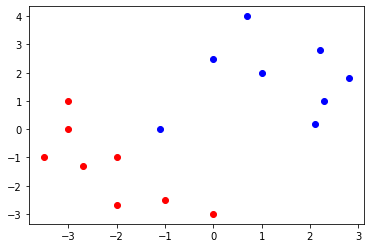

In [3]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In the next cell you are required to find the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles (check the svm slides uploaded in the portal). Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

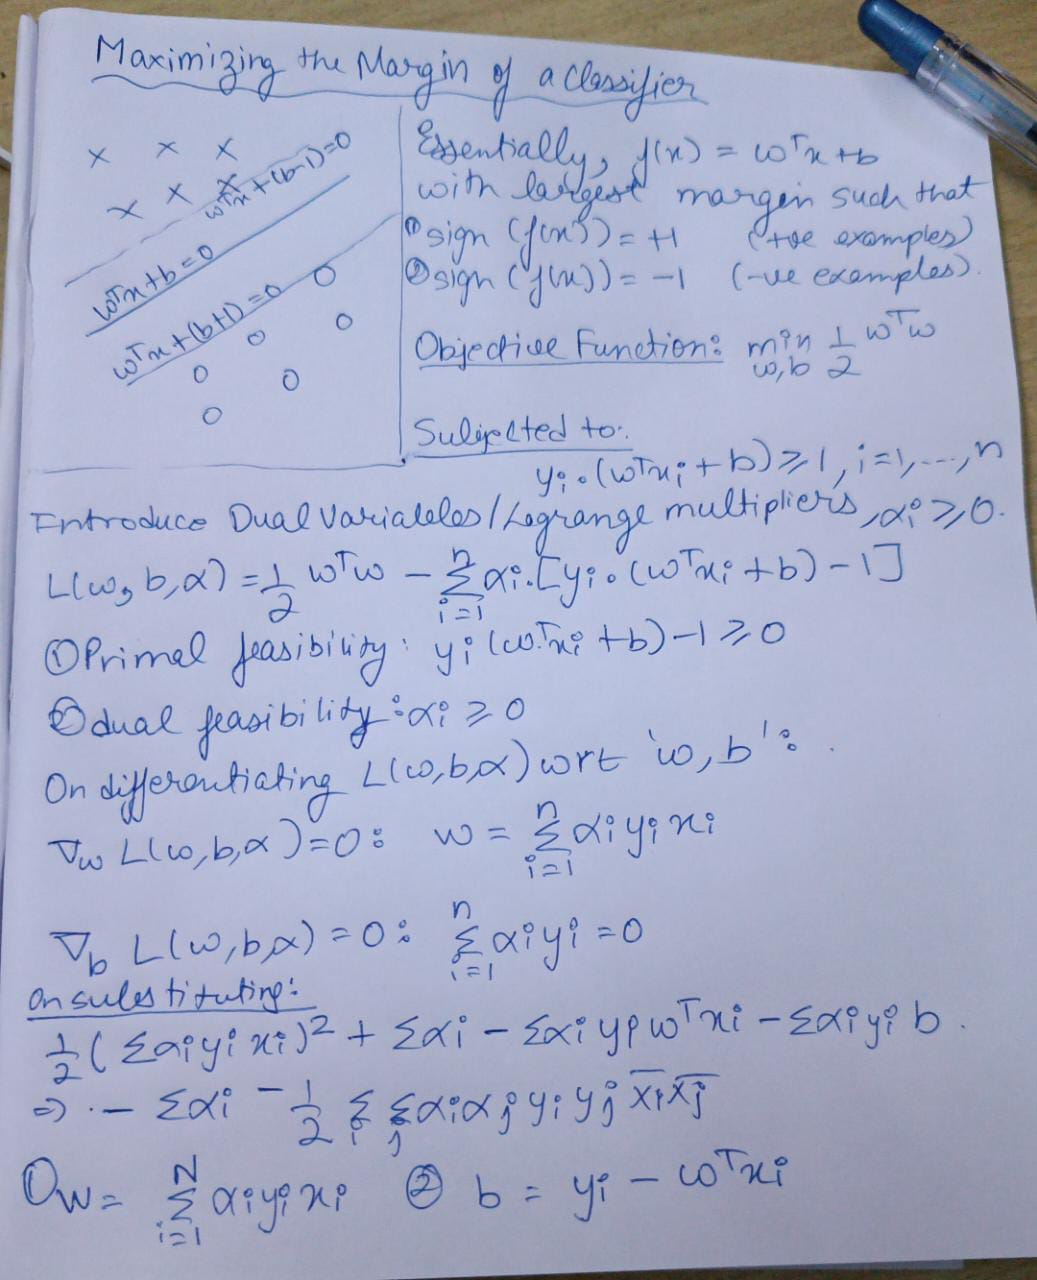

In [4]:
def svm_hard(X,y):
    n,d = X.shape
    w = cp.Variable(d)
    b = cp.Variable()
    objective = cp.Minimize(cp.sum_squares(w) / 2)
    constraints = [y[i] * (w.T @ X[i] + b) >= 1 for i in range(n)]
    prob = cp.Problem(objective, constraints)
    prob.solve()
    return w.value, b.value, prob.value
    
w, b, result = svm_hard(X, y)
print("w =", w)
print("b =", b)
print("Optimal value =", result)

w = [-1.73913043 -1.30434783]
b = -2.91304347826087
Optimal value = 2.3629489603024565


In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines.

Create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

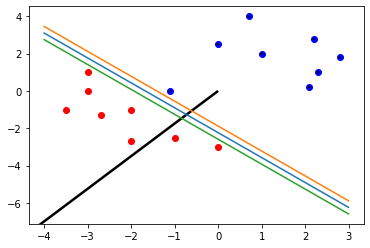

In [5]:
def plot_boundary_margin(X, y, w, b):
    plot_points(X, y)
    x = np.linspace(-4, 3, 100)
    y = -(w[0] * x + b) / w[1]
    plt.plot(x, y)
    plt.quiver(0, 0, w[0], w[1], scale = 1, color = 'k')
    margin = 1 / np.linalg.norm(w)
    #Here, we find the support vecs
    support_vectors = []
    for i in range(X.shape[0]):
      if y[i] * (np.dot(X[i], w) + b) <= 1:
          support_vectors.append(X[i])
    #Margin: Dist between nearest support vector and boundary
    support_vectors = np.array(support_vectors)
    distances = []
    for i in range(len(support_vectors)):
        distances.append(np.abs(np.dot(support_vectors[i], w) + b) / np.linalg.norm(w))
    margin = np.min(distances)
    y1 = -(w[0] * x + b + margin) / w[1]
    y2 = -(w[0] * x + b - margin) / w[1]
    plt.plot(x, y1)
    plt.plot(x, y2)
    #Trying to make the support vectors standout
    for sv in support_vectors:
        plt.scatter(sv[0], sv[1], s = 2, facecolors='none', edgecolors = 'k')
    plt.show()

plot_boundary_margin(X, y, w, b)

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Plot it. Explain your observations theoretically.

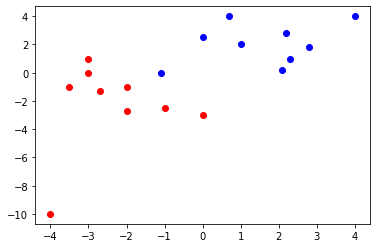

In [6]:
# Re-create the Synthetic Data by adding the points and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7],
                [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4],
                [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8], [-4, -10], [4, 4]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1])

plot_points(X, y)
plt.show()

w = [-1.73913043 -1.30434783]
b = -2.9130434782608705
Optimal value = 2.3629489603024587


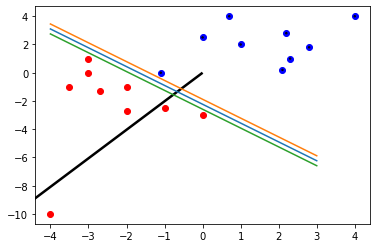

In [7]:
# Solve for the decision boundary using this modified dataset
w, b, result = svm_hard(X, y)
print("w =", w)
print("b =", b)
print("Optimal value =", result)
plot_boundary_margin(X, y, w, b)

## Analysis:
**No, the extra points are not even close to the decision boundary, and it is obvious that they have no effect whatsoever on the margins and the decision border. As can be seen, the decision boundary continues to divide the two red points from the one blue point (which is closest to the margin). Hence, even after we add the points, the decision boundary remains the same.**

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

In [8]:
def svm_soft(X,y,C):
    n,d = X.shape
    w = cp.Variable(d)
    b = cp.Variable()
    slack = cp.Variable(n)
    objective = cp.Minimize(cp.sum_squares(w) / 2 + C * cp.sum(slack))
    constraints = [y[i] * (w.T @ X[i] + b) >= 1 - slack[i] for i in range(n)]
    constraints += [slack[i] >= 0 for i in range(n)]
    prob = cp.Problem(objective, constraints)
    prob.solve()
    return w.value, b.value, slack.value, prob.value


In [9]:
def plot_boundary_margin_soft(X, y, w, b, xi):
    plot_points(X, y)
    x = np.linspace(-4, 3, 100)
    y = -(w[0] * x + b) / w[1]
    plt.plot(x, y)
    plt.quiver(0, 0, w[0], w[1], scale = 1, color = 'k')
    #Here, we find the support vecs
    support_vectors = []
    for i in range(X.shape[0]):
      if y[i] * (np.dot(X[i], w) + b) <= 1 + xi[i]:
          support_vectors.append(X[i])
    #Margin: Dist between nearest support vector and boundary
    support_vectors = np.array(support_vectors)
    distances = []
    for i in range(len(support_vectors)):
        distances.append(np.abs(np.dot(support_vectors[i], w) + b) / np.linalg.norm(w))
    margin = np.min(distances)
    y1 = -(w[0] * x + b + margin) / w[1]
    y2 = -(w[0] * x + b - margin) / w[1]
    plt.plot(x, y1)
    plt.plot(x, y2)
    #Plotting the slack variables as circles with radii proportional to their weightage
    for i in range(X.shape[0]):
        if xi[i] > 1e-4:
            plt.scatter(X[i][0], X[i][1], s = 100 * xi[i], facecolors='none', edgecolors = 'k')
    #Trying to make the support vectors standout
    for sv in support_vectors:
        plt.scatter(sv[0], sv[1], s = 2, facecolors='none', edgecolors = 'k')
    plt.show()


w = [-0.22506809 -0.19858949]
b = 0.013672178988326457
slack = [ 8.54966858e-20  3.11123541e-01  5.09713035e-01  1.20477626e-01
  3.37602140e-01 -8.53908945e-20  2.64785992e-01  3.90559339e-01
  1.26124708e+00  5.17198444e-01  3.91425097e-01  6.17665370e-02
  5.01311284e-01  2.97426070e-01  2.60204280e-02  1.00013542e-30
  1.00013542e-30  1.00013542e-30]
result = 0.09495328307392997


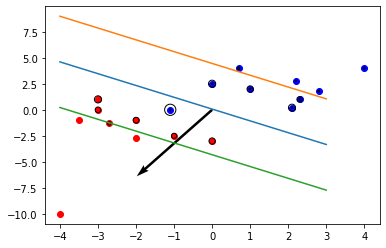

In [10]:
# Write your code here for C= 0.01
w, b, slack, result = svm_soft(X, y, 0.01)
print("w =", w)
print("b =", b)
print("slack =", slack)
print("result =", result)
plot_boundary_margin_soft(X, y, w, b, slack)

w = [-0.38493724 -0.35146444]
b = -0.12133891213389113
slack = [ 1.00013542e-30  1.00013542e-30  3.17991632e-01  1.00013542e-30
  1.48554851e-22  1.00013542e-30  1.00013542e-30  6.69456067e-02
  1.30209205e+00 -3.26924700e-22  1.00013542e-30  1.00013542e-30
  2.53434312e-22  1.00013542e-30  1.00013542e-30  1.00013542e-30
  1.00013542e-30  1.00013542e-30]
result = 0.3045548922462842


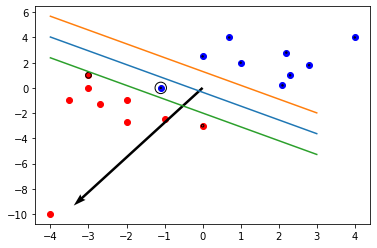

In [11]:
# Write your code here for C= 0.1
w, b, slack, result = svm_soft(X, y, 0.1)
print("w =", w)
print("b =", b)
print("slack =", slack)
print("result =", result)
plot_boundary_margin_soft(X, y, w, b, slack)

w = [-1.73913043 -1.30434783]
b = -2.913043478260871
slack = [1.00013542e-30 1.00013542e-30 2.93352115e-22 1.00013542e-30
 1.00013542e-30 1.00013542e-30 1.00013542e-30 2.87544746e-22
 6.08652811e-22 1.00013542e-30 1.00013542e-30 1.00013542e-30
 1.00013542e-30 1.00013542e-30 1.00013542e-30 1.00013542e-30
 1.00013542e-30 1.00013542e-30]
result = 2.362948960302459


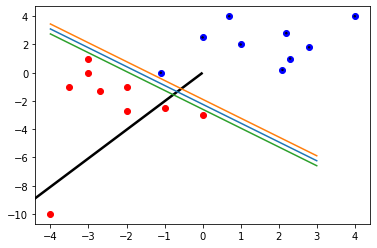

In [12]:
# Write your code here for C= 3
w, b, slack, result = svm_soft(X, y, 3)
print("w =", w)
print("b =", b)
print("slack =", slack)
print("result =", result)
plot_boundary_margin_soft(X, y, w, b, slack)

w = [-1.73913043 -1.30434783]
b = -2.913043478260871
slack = [1.00013542e-30 1.00013542e-30 3.22657238e-22 1.00013542e-30
 1.00013542e-30 1.00013542e-30 1.00013542e-30 3.53991756e-22
 7.01137674e-22 1.00013542e-30 1.00013542e-30 1.00013542e-30
 1.00013542e-30 1.00013542e-30 1.00013542e-30 1.00013542e-30
 1.00013542e-30 1.00013542e-30]
result = 2.3629489603024587


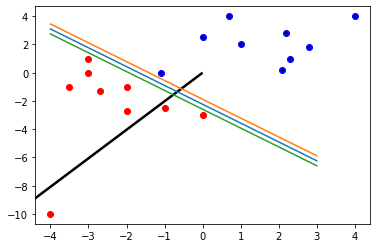

In [13]:
# Write your code here for C= 10
w, b, slack, result = svm_soft(X, y, 10)
print("w =", w)
print("b =", b)
print("slack =", slack)
print("result =", result)
plot_boundary_margin_soft(X, y, w, b, slack)

w = [-1.73913043 -1.30434783]
b = -2.913043478260871
slack = [1.00013542e-30 1.00013542e-30 3.28960461e-22 1.00013542e-30
 1.00013542e-30 1.00013542e-30 1.00013542e-30 3.57251111e-22
 6.80209638e-22 1.00013542e-30 1.00013542e-30 1.00013542e-30
 1.00013542e-30 1.00013542e-30 1.00013542e-30 1.00013542e-30
 1.00013542e-30 1.00013542e-30]
result = 2.362948960302459


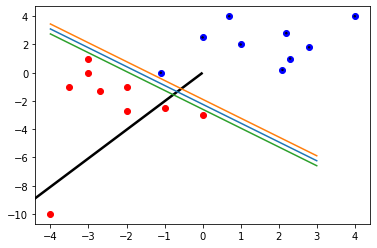

In [14]:
# Write your code here for C= 100
w, b, slack, result = svm_soft(X, y, 100)
print("w =", w)
print("b =", b)
print("slack =", slack)
print("result =", result)
plot_boundary_margin_soft(X, y, w, b, slack)

## Analysis: 
The margins are quite far apart for $C=0.01$, we see that this distance decreases when when $C=0.1$. However, for $C=3$, $C=10$ and $C=100$, the margin is at about the same distance from the decision boundary. Thus, we get a better divider as the value of $C$ increases.

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion? Explain why?

w = [-0.38493724 -0.35146444]
b = -0.12133891213389121
slack = [ 1.00013542e-30  1.00013542e-30  1.00013542e-30  2.60505701e-24
  1.00013542e-30  1.00013542e-30  4.35065378e-24  1.00013542e-30
  1.00013542e-30 -2.20142659e-24  1.00013542e-30  1.00013542e-30
  1.00013542e-30  1.00013542e-30  1.00013542e-30]
result = 0.13585196337599129


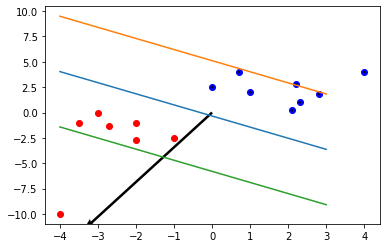

In [ ]:
# Write your Code here
X = np.array([[-3.5, -1], [-3, 0], [-2.7, -1.3], [-2, -1], [-2, -2.7],
                [-1, -2.5],   [0, 2.5], [1, 2], [0.7, 4],
                [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8], [-4, -10], [4, 4]])
y = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1])
w, b, slack, result = svm_soft(X, y, 100)
print("w =", w)
print("b =", b)
print("slack =", slack)
print("result =", result)
plot_boundary_margin_soft(X, y, w, b, slack)

## Analysis:
As the support vectors are removed, the boundary and margins shift significantly because the SVM is now trying to maximise the new margin while also trying to obtain new support vectors for the data. As a result, the boundary changes to make room for the new support vectors.

### Subsection 2

In [15]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-03-27 20:12:13--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 188.114.97.0, 188.114.96.0, 2a06:98c1:3120::, ...
Connecting to yann.lecun.com (yann.lecun.com)|188.114.97.0|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.06s   

2023-03-27 20:12:13 (159 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2023-03-27 20:12:14--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 188.114.97.0, 188.114.96.0, 2a06:98c1:3120::, ...
Connecting to yann.lecun.com (yann.lecun.com)|188.114.97.0|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [app

In [16]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [17]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [18]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels (Linear, Polynomial, RBF, Sigmoid) for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [19]:
# use this subset of data for training and testing
batch = 3000
X_train = images_train[:batch,:]
y_train = labels_train[:batch]

X_test = images_test[batch:2*batch,:]
y_test = labels_test[batch:2*batch]

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3000, 784)
(3000,)
(3000, 784)
(3000,)


# Varying $C$ Params

In [23]:
C_params = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for C in C_params:
    svm = SVC(C = C, kernel = 'linear')
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    cm = confusion_matrix(y_test, y_pred)
    print(f"Linear SVM with C={C}")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix:")
    print(cm)
    print("---------------------------")

Linear SVM with C=0.001
Accuracy: 0.8893333333333333
F1 Score: 0.8890444070271425
Confusion Matrix:
[[288   0   4   0   1   1   1   1   1   0]
 [  0 339   1   2   0   1   2   1   0   0]
 [  3   5 286   6   4   0   1   4   3   0]
 [  3   2   8 237   0  18   0   3   5   3]
 [  1   1   5   0 250   0   3   1   0  20]
 [  3   2   1  14   1 226   2   3  11   2]
 [  6   0   8   0   7   6 260   2   1   0]
 [  0   4  10   5   2   0   1 259   2  20]
 [  4   3   2  13   6  19   3   2 245   4]
 [  2   5   3   7  18   1   0  11   1 278]]
---------------------------
Linear SVM with C=0.01
Accuracy: 0.8893333333333333
F1 Score: 0.8890444070271425
Confusion Matrix:
[[288   0   4   0   1   1   1   1   1   0]
 [  0 339   1   2   0   1   2   1   0   0]
 [  3   5 286   6   4   0   1   4   3   0]
 [  3   2   8 237   0  18   0   3   5   3]
 [  1   1   5   0 250   0   3   1   0  20]
 [  3   2   1  14   1 226   2   3  11   2]
 [  6   0   8   0   7   6 260   2   1   0]
 [  0   4  10   5   2   0   1 259   2  20

## Analysis:
Varying $C$ doesnt have any effect. The scores remain the same throughout.


# Varying $Gamma$ Params

In [24]:
Gamma_params = [0.01, 0.1, 1, 10, 100, 'auto']
for gamma in Gamma_params:
    svm = SVC(kernel = 'linear', gamma = gamma)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    cm = confusion_matrix(y_test, y_pred)
    print(f"RBF SVM with gamma={gamma}")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix:")
    print(cm)
    print("---------------------------")

RBF SVM with gamma=0.01
Accuracy: 0.8893333333333333
F1 Score: 0.8890444070271425
Confusion Matrix:
[[288   0   4   0   1   1   1   1   1   0]
 [  0 339   1   2   0   1   2   1   0   0]
 [  3   5 286   6   4   0   1   4   3   0]
 [  3   2   8 237   0  18   0   3   5   3]
 [  1   1   5   0 250   0   3   1   0  20]
 [  3   2   1  14   1 226   2   3  11   2]
 [  6   0   8   0   7   6 260   2   1   0]
 [  0   4  10   5   2   0   1 259   2  20]
 [  4   3   2  13   6  19   3   2 245   4]
 [  2   5   3   7  18   1   0  11   1 278]]
---------------------------
RBF SVM with gamma=0.1
Accuracy: 0.8893333333333333
F1 Score: 0.8890444070271425
Confusion Matrix:
[[288   0   4   0   1   1   1   1   1   0]
 [  0 339   1   2   0   1   2   1   0   0]
 [  3   5 286   6   4   0   1   4   3   0]
 [  3   2   8 237   0  18   0   3   5   3]
 [  1   1   5   0 250   0   3   1   0  20]
 [  3   2   1  14   1 226   2   3  11   2]
 [  6   0   8   0   7   6 260   2   1   0]
 [  0   4  10   5   2   0   1 259   2  20

## Analysis:
Varying $Gamma$ doesnt have any effect. The scores remain the same throughout.
This is possibly due to the fact that we are using Linear SVM for the same. 

This can lead us to assume that both the $C$ and $Gamma$ parameters do not have any major influence on the Linear SVM.


# Varying $Kernel$ 

In [26]:
Kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in Kernels:
    svm = SVC(kernel = kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    cm = confusion_matrix(y_test, y_pred)
    print(f"SVM with kernel={kernel}")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix:")
    print(cm)
    print("---------------------------")

SVM with kernel=linear
Accuracy: 0.8893333333333333
F1 Score: 0.8890444070271425
Confusion Matrix:
[[288   0   4   0   1   1   1   1   1   0]
 [  0 339   1   2   0   1   2   1   0   0]
 [  3   5 286   6   4   0   1   4   3   0]
 [  3   2   8 237   0  18   0   3   5   3]
 [  1   1   5   0 250   0   3   1   0  20]
 [  3   2   1  14   1 226   2   3  11   2]
 [  6   0   8   0   7   6 260   2   1   0]
 [  0   4  10   5   2   0   1 259   2  20]
 [  4   3   2  13   6  19   3   2 245   4]
 [  2   5   3   7  18   1   0  11   1 278]]
---------------------------
SVM with kernel=poly
Accuracy: 0.9173333333333333
F1 Score: 0.9173073489581842
Confusion Matrix:
[[278   2   1   0   0   9   4   1   2   0]
 [  0 342   1   2   0   0   1   0   0   0]
 [  1   8 286   4   3   0   1   6   2   1]
 [  0   6   6 249   0   9   0   4   5   0]
 [  1   4   1   0 260   0   4   0   0  11]
 [  1   3   0   7   1 241   3   2   5   2]
 [  6   2   1   0   5   2 274   0   0   0]
 [  0  10   5   0   4   0   1 265   1  17]
 

## Analysis:
We notice that the `rbf kernel` gives the best scores followed by `poly kernel` then `linear kernel` and finally `sigmoid kernel`.
